tf.Tensor(
[ -2.4889655   -6.9510403   -6.7026367    6.221432    -2.5147579
  -0.6760782    6.347802     1.1613573    1.4287446   -2.1836593
   5.6475396    0.6145447    0.8028887    2.3141704   -2.2139995
   7.6278358    7.839861    -5.281867   -10.865391    -4.7535586
  12.049677     1.550298    -1.4500993   -2.2313383    3.335191
   0.97013414   5.9182706   -2.1384048   -6.6397367   -6.284513
  -0.19982521   1.2392424   -2.9502838   10.179612    -1.3700165
  -9.814564     1.6361263    8.005719     4.925096     4.7040453
  11.274383     4.7110233    7.8523207   -2.0176973   -1.9778509
  -9.373723    -1.3724537    4.377432     4.4151487    3.196667
  -4.0914683    4.66604     -4.095544     1.5607629    7.188212
   0.49175167  -0.83501273   2.2044861    2.7752252   -3.6615982
  -1.0513471   -2.1719375   -2.553081     0.68912816  -3.7724514
   0.3160731   -3.6534564    4.342854     7.7616587    8.705961
   3.7767887    9.208791     0.4525784    1.1348842  -16.26497
   8.095998    12.166

2022-10-06 17:27:43.400091: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-10-06 17:27:43.430495: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-10-06 17:27:43.503665: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


0 cost: 20389.85 a0: [-2.3444157] a1: [-2.3444157] a2: [-2.3444157] a3: [-2.3444157]
50 cost: 12858.185 a0: [-1.8589327] a1: [-1.8589741] a2: [-1.8590076] a3: [-1.8590274]


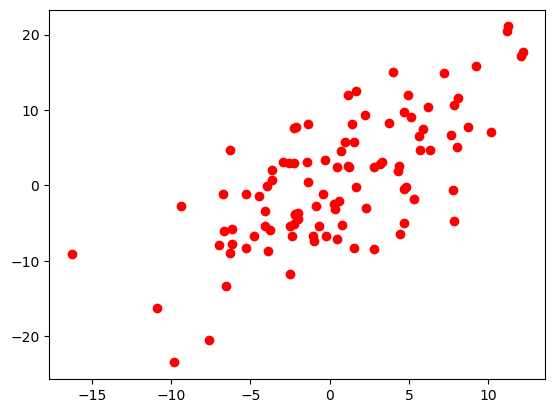

In [52]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 2) 입력 데이터 생성하기
# 입력값 X 정규분포 100개
X = tf.constant(np.random.normal(0, 5, 100), dtype=tf.float32)
# 노이즈 100 개
noise = tf.constant(np.random.normal(0, 5, 100) , dtype=tf.float32)
# 출력값 Y 100개
Y = X + noise
# 2) 입력데이터 프린트하기
print(X , Y)

# 3) 가중치 파라미터
a0 = tf.Variable(tf.random.normal([1], -1.0, 1.0))
a1 = tf.Variable(tf.random.normal([1], -1.0, 1.0))
a2 = tf.Variable(tf.random.normal([1], -1.0, 1.0))
a3 = tf.Variable(tf.random.normal([1], -1.0, 1.0))

"""
a0 = tf.Variable(tf.random.uniform([1], -1.0, 1.0))
a1 = tf.Variable(tf.random.uniform([1], -1.0, 1.0))
a2 = tf.Variable(tf.random.uniform([1], -1.0, 1.0))
a3 = tf.Variable(tf.random.uniform([1], -1.0, 1.0))
"""

optimizer = tf.optimizers.Adam(0.01)

# 1) 회귀 함수 정의하기
@tf.function
def cost_eval():
    print("a"  ,tf.multiply( a1 ,new_X) )
    hypothesis = a0 + a1*new_X + (a2*(new_X**2)) + (a3*(new_X**3))
    cost = tf.reduce_mean(tf.square(hypothesis - Y))
    return cost

for epoch in range(100):
    optimizer.minimize(cost_eval, var_list=[a0, a1, a2, a3])
    if epoch % 50 == 0:
        print(epoch, "cost:", cost_eval().numpy(), "a0:", a0.numpy(),
              "a1:", a1.numpy(), "a2:", a2.numpy(), "a3:", a3.numpy())
    if(cost_eval().numpy() < 0.15):
        break
    
# 5 그래프를 그리기위해 새로운 입력값 X를 정의)
new_X = tf.range(0, 5, 0.05)
new_Y = a0 + a1*new_X + (a2*(new_X**2)) + (a3*(new_X**3))
plt.plot(X , Y , 'ro' , label='Sample Data')
#plt.plot(new_X , new_Y , label='Fitted Line')
